In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tensorflow as tf
import pickle
from PIL import Image
# To ignore all warnings
# import warnings
# warnings.filterwarnings('ignore')

ImportError: cannot import name 'open_image' from 'PIL' (/Users/jeffreybaksa/opt/anaconda3/lib/python3.8/site-packages/PIL/__init__.py)

This dataset is crop info based in India. Any recommender that can be implement with this can be used with US data as well.

* Link: [Dataset](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset) 

In [26]:
crops = pd.read_csv('data/Crop_recommendation.csv')

In [309]:
type(crops['rainfall'][0])

numpy.float64

In [27]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [407]:
crops.iloc[0]

N                      90
P                      42
K                      43
temperature     20.879744
humidity        82.002744
ph               6.502985
rainfall       202.935536
label                rice
Name: 0, dtype: object

In [28]:
crops.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [29]:
crops.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [30]:
crops['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [31]:
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

In [45]:
crops.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

## Rice

In [32]:
crops[crops['label'] == 'rice']['rainfall'].mean()

236.1811135939999

## Maize

In [33]:
crops[crops['label'] == 'maize']['rainfall'].mean()

84.766987663

## Chickpea

In [34]:
crops[crops['label'] == 'chickpea']['rainfall'].mean()

80.0589772605

## Cotton

In [35]:
crops[crops['label'] == 'cotton']['rainfall'].mean()

80.39804311930001

## Dictionaries

In [36]:
avg_nitrogen_d = {} # Nitrogen
for label in labels:
    avg_nitrogen_d[label] = crops[crops['label'] == label]['N'].mean()
avg_nitrogen_d

{'rice': 79.89,
 'maize': 77.76,
 'chickpea': 40.09,
 'kidneybeans': 20.75,
 'pigeonpeas': 20.73,
 'mothbeans': 21.44,
 'mungbean': 20.99,
 'blackgram': 40.02,
 'lentil': 18.77,
 'pomegranate': 18.87,
 'banana': 100.23,
 'mango': 20.07,
 'grapes': 23.18,
 'watermelon': 99.42,
 'muskmelon': 100.32,
 'apple': 20.8,
 'orange': 19.58,
 'papaya': 49.88,
 'coconut': 21.98,
 'cotton': 117.77,
 'jute': 78.4,
 'coffee': 101.2}

In [37]:
avg_phos_d = {} # Phosphorous
for label in labels:
    avg_phos_d[label] = crops[crops['label'] == label]['P'].mean()
avg_phos_d

{'rice': 47.58,
 'maize': 48.44,
 'chickpea': 67.79,
 'kidneybeans': 67.54,
 'pigeonpeas': 67.73,
 'mothbeans': 48.01,
 'mungbean': 47.28,
 'blackgram': 67.47,
 'lentil': 68.36,
 'pomegranate': 18.75,
 'banana': 82.01,
 'mango': 27.18,
 'grapes': 132.53,
 'watermelon': 17.0,
 'muskmelon': 17.72,
 'apple': 134.22,
 'orange': 16.55,
 'papaya': 59.05,
 'coconut': 16.93,
 'cotton': 46.24,
 'jute': 46.86,
 'coffee': 28.74}

In [38]:
avg_potass_d = {} # Potassium
for label in labels:
    avg_potass_d[label] = crops[crops['label'] == label]['K'].mean()
avg_potass_d

{'rice': 39.87,
 'maize': 19.79,
 'chickpea': 79.92,
 'kidneybeans': 20.05,
 'pigeonpeas': 20.29,
 'mothbeans': 20.23,
 'mungbean': 19.87,
 'blackgram': 19.24,
 'lentil': 19.41,
 'pomegranate': 40.21,
 'banana': 50.05,
 'mango': 29.92,
 'grapes': 200.11,
 'watermelon': 50.22,
 'muskmelon': 50.08,
 'apple': 199.89,
 'orange': 10.01,
 'papaya': 50.04,
 'coconut': 30.59,
 'cotton': 19.56,
 'jute': 39.99,
 'coffee': 29.94}

In [39]:
avg_temp_d = {} # celsius
for label in labels:
    avg_temp_d[label] = crops[crops['label'] == label]['temperature'].mean()
avg_temp_d

{'rice': 23.689332210500005,
 'maize': 22.389203910200003,
 'chickpea': 18.872846751900003,
 'kidneybeans': 20.115084685100005,
 'pigeonpeas': 27.741762225899997,
 'mothbeans': 28.194920484199987,
 'mungbean': 28.525774735299997,
 'blackgram': 29.97333967889999,
 'lentil': 24.50905240260001,
 'pomegranate': 21.837841722000004,
 'banana': 27.3767983057,
 'mango': 31.208770151299987,
 'grapes': 23.849575120050005,
 'watermelon': 25.591767237500004,
 'muskmelon': 28.663065755999995,
 'apple': 22.6309424132,
 'orange': 22.765725496699996,
 'papaya': 33.7238587388,
 'coconut': 27.409892172299998,
 'cotton': 23.988957895200016,
 'jute': 24.9583758265,
 'coffee': 25.540476819299997}

In [40]:
avg_humid_d = {} # relative humidity in %
for label in labels:
    avg_humid_d[label] = crops[crops['label'] == label]['humidity'].mean()
avg_humid_d

{'rice': 82.2728215389,
 'maize': 65.09224944670001,
 'chickpea': 16.8604394237,
 'kidneybeans': 21.60535672949999,
 'pigeonpeas': 48.06163308470001,
 'mothbeans': 53.160418027900015,
 'mungbean': 85.49997454300001,
 'blackgram': 65.11842558870002,
 'lentil': 64.80478467849998,
 'pomegranate': 90.12550378949999,
 'banana': 80.35812258109999,
 'mango': 50.156572695300035,
 'grapes': 81.87522752119999,
 'watermelon': 85.16037529360001,
 'muskmelon': 92.34280196090002,
 'apple': 92.33338287560004,
 'orange': 92.17020876340004,
 'papaya': 92.40338768259998,
 'coconut': 94.84427180609998,
 'cotton': 79.84347425379998,
 'jute': 79.6398642063,
 'coffee': 58.869846300299976}

In [41]:
avg_ph_d = {} # acidic 0 - 14 basic of soil
for label in labels:
    avg_ph_d[label] = crops[crops['label'] == label]['ph'].mean()
avg_ph_d

{'rice': 6.425470922139999,
 'maize': 6.245189722399997,
 'chickpea': 7.33695662374,
 'kidneybeans': 5.749410585869998,
 'pigeonpeas': 5.794174879790001,
 'mothbeans': 6.8311740826900005,
 'mungbean': 6.723956940370001,
 'blackgram': 7.1339516294799985,
 'lentil': 6.927931571609998,
 'pomegranate': 6.42917184117,
 'banana': 5.983893180240001,
 'mango': 5.766372799660001,
 'grapes': 6.025936681100002,
 'watermelon': 6.49577830157,
 'muskmelon': 6.358805451790002,
 'apple': 5.9296629318099985,
 'orange': 7.01695745276,
 'papaya': 6.74144237274,
 'coconut': 5.976562126190004,
 'cotton': 6.91267549578,
 'jute': 6.732777568170002,
 'coffee': 6.790308274570002}

In [42]:
avg_rain_d = {} # in mm
for label in labels:
    avg_rain_d[label] = crops[crops['label'] == label]['rainfall'].mean()
avg_rain_d

{'rice': 236.1811135939999,
 'maize': 84.766987663,
 'chickpea': 80.0589772605,
 'kidneybeans': 105.91977754210005,
 'pigeonpeas': 149.45756381350003,
 'mothbeans': 51.198487045700006,
 'mungbean': 48.40360090290002,
 'blackgram': 67.88415118319999,
 'lentil': 45.68045420399998,
 'pomegranate': 107.52844239700002,
 'banana': 104.62698040009998,
 'mango': 94.70451504479996,
 'grapes': 69.61182888600003,
 'watermelon': 50.786218944900014,
 'muskmelon': 24.689952066000004,
 'apple': 112.65477927500005,
 'orange': 110.47496871999998,
 'papaya': 142.62783886290003,
 'coconut': 175.68664580400008,
 'cotton': 80.39804311930001,
 'jute': 174.792797536,
 'coffee': 158.06629488199994}

## Plots

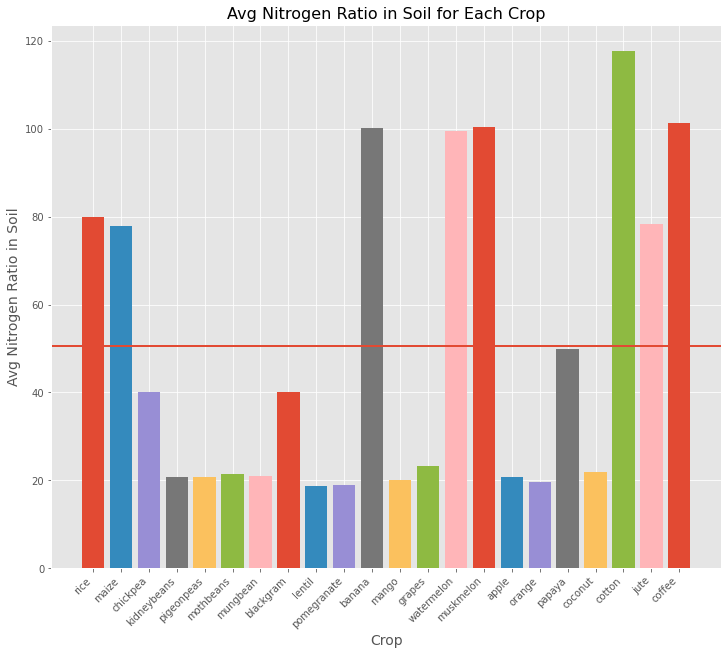

In [299]:
fig, ax = plt.subplots(figsize=(12, 10))
mean_of_nitrogen = 50.551818

for key, value in avg_nitrogen_d.items():
    ax.bar(key, value)
    ax.set_xlabel('Crop', fontsize=14)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.axhline(mean_of_nitrogen)
    ax.set_ylabel('Avg Nitrogen Ratio in Soil', fontsize=14)
    ax.set_title('Avg Nitrogen Ratio in Soil for Each Crop', fontsize=16);

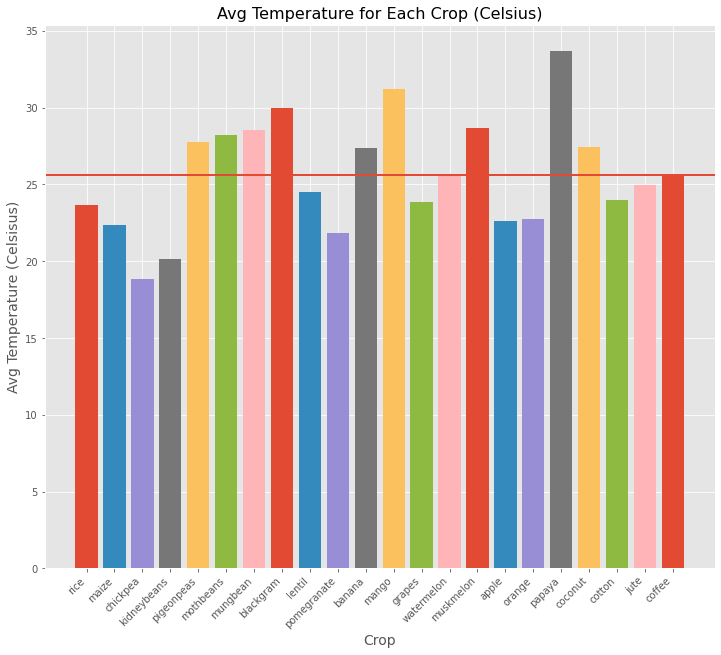

In [291]:
# Temperature
fig, ax = plt.subplots(figsize=(12, 10))
mean_of_temp = 25.616244

for key, value in avg_temp_d.items():
    ax.bar(key, value)
    ax.set_xlabel('Crop', fontsize=14)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.axhline(mean_of_temp)
    ax.set_ylabel('Avg Temperature (Celsisus)', fontsize=14)
    ax.set_title('Avg Temperature for Each Crop (Celsius)', fontsize=16);

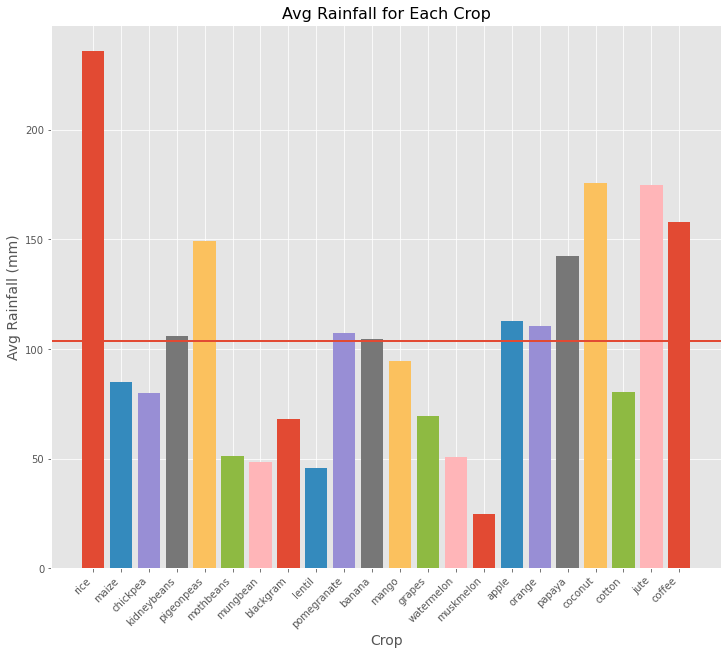

In [290]:
fig, ax = plt.subplots(figsize=(12, 10))
mean_of_rain = 103.463655

for key, value in avg_rain_d.items():
    ax.bar(key, value)
    ax.set_xlabel('Crop', fontsize=14)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.axhline(mean_of_rain)
    ax.set_ylabel('Avg Rainfall (mm)', fontsize=14)
    ax.set_title('Avg Rainfall for Each Crop', fontsize=16);

## Different Classifier Models

### Setup for All Models

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [122]:
# Creating X, y
X = crops[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = crops['label']

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 1) Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train, y_train)
dt_pred = dtree.predict(X_test)

In [152]:
for i, j in zip(y_test, dt_pred):
    if i != j:
        print(i, j)

rice jute
jute rice
kidneybeans lentil
jute rice
mothbeans lentil
jute rice
rice jute
mothbeans blackgram
maize cotton
mothbeans lentil
maize cotton


In [207]:
dt_accuracy = np.round(accuracy_score(y_test, dt_pred), 10)
dt_precision = np.round(precision_score(y_test, dt_pred, average='macro'), 10)
dt_recall = np.round(recall_score(y_test, dt_pred, average='macro'), 10)
dt_f1 = np.round(f1_score(y_test, dt_pred, average='macro'), 10)

In [208]:
print("DecisionTree \n-------------")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")

DecisionTree 
-------------
Accuracy: 0.9833333333
Precision: 0.9830116442
Recall: 0.9814833716
F1 Score: 0.9818091743


In [158]:
# Testing Flask App input
input_ = np.array([36, 61.4, 43.19, 30, 30, 6.2, 82.3]).reshape(1, -1)
dtree.predict(input_)

array(['pigeonpeas'], dtype=object)

### 2) Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [149]:
for i, j in zip(y_test, rf_pred):
    if i != j:
        print(i, j)

rice jute
rice jute
mothbeans lentil
maize cotton


In [205]:
rf_accuracy = np.round(accuracy_score(y_test, rf_pred), 10)
rf_precision = np.round(precision_score(y_test, rf_pred, average='macro'), 10)
rf_recall = np.round(recall_score(y_test, rf_pred, average='macro'), 10)
rf_f1 = np.round(f1_score(y_test, rf_pred, average='macro'), 10)

In [206]:
print("RandomForest \n-------------")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")

RandomForest 
-------------
Accuracy: 0.9939393939
Precision: 0.9944014929
Recall: 0.992614019
F1 Score: 0.9933264335


In [134]:
# Testing Flask App input
input_ = np.array([36, 61.4, 43.19, 30, 30, 6.2, 82.3]).reshape(1, -1)
rf.predict(input_)

array(['mango'], dtype=object)

### 3) Stochastic Gradient Descent

In [97]:
from sklearn.linear_model import SGDClassifier

In [181]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

In [182]:
# See which ones it got wrong
for i, j in zip(y_test, sgd_pred):
    if i != j:
        print(i, j)

blackgram papaya
jute papaya
jute papaya
coconut papaya
banana papaya
mothbeans mungbean
watermelon papaya
jute maize
banana papaya
jute papaya
rice papaya
banana papaya
apple papaya
lentil papaya
blackgram maize
banana papaya
jute maize
jute papaya
banana papaya
jute papaya
mango papaya
banana papaya
mothbeans mungbean
jute papaya
rice papaya
banana papaya
mothbeans maize
banana papaya
banana papaya
rice papaya
blackgram lentil
jute papaya
banana papaya
coffee papaya
mothbeans papaya
jute papaya
pigeonpeas papaya
mothbeans papaya
banana papaya
banana papaya
mungbean papaya
mungbean papaya
blackgram maize
blackgram maize
mango papaya
jute papaya
jute papaya
jute papaya
lentil papaya
mothbeans maize
watermelon papaya
jute papaya
banana papaya
mango papaya
jute papaya
lentil maize
jute papaya
jute papaya
blackgram maize
mango papaya
lentil papaya
mango papaya
mango papaya
banana papaya
coffee maize
jute papaya
blackgram papaya
banana papaya
banana papaya
blackgram papaya
coconut papaya
b

In [202]:
sgd_accuracy = np.round(accuracy_score(y_test, sgd_pred), 10)
sgd_precision = np.round(precision_score(y_test, sgd_pred, average='macro'), 10)
sgd_recall = np.round(recall_score(y_test, sgd_pred, average='macro'), 10)
sgd_f1 = np.round(f1_score(y_test, sgd_pred, average='macro'), 10)

/Users/jeffreybaksa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
print("Stochastic Gradient Descent \n-------------")
print(f"Accuracy: {sgd_accuracy}")
print(f"Precision: {sgd_precision}")
print(f"Recall: {sgd_recall}")
print(f"F1 Score: {sgd_f1}")

Stochastic Gradient Descent 
-------------
Accuracy: 0.7772727273
Precision: 0.833260911
Recall: 0.7720244619
F1 Score: 0.7651315666


In [159]:
# Testing Flask App input
input_ = np.array([36, 61.4, 43.19, 30, 30, 6.2, 82.3]).reshape(1, -1)
sgd.predict(input_)

array(['mothbeans'], dtype='<U11')

### 4) K-Nearest Neighbors

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [199]:
# See which ones it got wrong
for i, j in zip(y_test, knn_pred):
    if i != j:
        print(i, j)

jute rice
rice jute
mothbeans lentil
rice jute
jute rice
mothbeans lentil
mothbeans lentil
maize cotton


In [200]:
knn_accuracy = np.round(accuracy_score(y_test, knn_pred), 10)
knn_precision = np.round(precision_score(y_test, knn_pred, average='macro'), 10)
knn_recall = np.round(recall_score(y_test, knn_pred, average='macro'), 10)
knn_f1 = np.round(f1_score(y_test, knn_pred, average='macro'), 10)

In [201]:
print("K-Nearest Neighbors \n-------------")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")

K-Nearest Neighbors 
-------------
Accuracy: 0.9878787879
Precision: 0.9880687055
Recall: 0.9863144643
F1 Score: 0.9869197712


### 5) Naive Bayes

In [209]:
from sklearn.naive_bayes import GaussianNB

In [281]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [282]:
# See which ones it got wrong
for i, j in zip(y_test, nb_pred):
    if i != j:
        print(i, j)

rice jute
maize cotton


In [370]:
# Get top 3 recommendations for 
for i in np.argsort(test[:10]):
    i = i[-3:][::-1]
    print(f"{crop_labels[i]}\n")

['coconut' 'pomegranate' 'watermelon']

['orange' 'pigeonpeas' 'mango']

['orange' 'coconut' 'mango']

['rice' 'blackgram' 'jute']

['apple' 'papaya' 'coffee']

['pigeonpeas' 'coconut' 'lentil']

['coffee' 'papaya' 'apple']

['mungbean' 'mango' 'mothbeans']

['rice' 'blackgram' 'jute']

['chickpea' 'watermelon' 'banana']



In [277]:
nb_accuracy = np.round(accuracy_score(y_test, nb_pred), 10)
nb_precision = np.round(precision_score(y_test, nb_pred, average='macro'), 10)
nb_recall = np.round(recall_score(y_test, nb_pred, average='macro'), 10)
nb_f1 = np.round(f1_score(y_test, nb_pred, average='macro'), 10)

In [278]:
print("Naive Bayes \n-------------")
print(f"Accuracy: {nb_accuracy}") # ratio of correct predictions
print(f"Precision: {nb_precision}") # TP / TP + FP... pos / all things identified as pos 
print(f"Recall: {nb_recall}") # TP / TP + FN... if this thing is pos...whats the prob i identified as pos
print(f"F1 Score: {nb_f1}") # harmonic mean of precision, recall

Naive Bayes 
-------------
Accuracy: 0.996969697
Precision: 0.9971132698
Recall: 0.9961157025
F1 Score: 0.9965486166


In [310]:
# Save the Model
pkl_filename = 'models/naive_bayes_model.pkl'

with open(pkl_filename, 'wb') as file:
    pickle.dump(nb, file)

In [284]:
# # To Open the Model back up
# # Load the Model back from file

# with open(pkl_filename, 'rb') as file:  
#     pickled_NB_Model = pickle.load(file)

# pickled_NB_Model

### 6) Logistic Regression

In [214]:
from sklearn.linear_model import LogisticRegression

In [217]:
lr = LogisticRegression() # Logistic Regression Classifier
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

/Users/jeffreybaksa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [218]:
# See which ones it got wrong
for i, j in zip(y_test, lr_pred):
    if i != j:
        print(i, j)

cotton maize
jute rice
mothbeans mungbean
jute rice
jute papaya
rice jute
maize banana
mothbeans mungbean
jute rice
blackgram lentil
mothbeans mungbean
lentil blackgram
rice jute
papaya coconut
kidneybeans pigeonpeas
jute rice
cotton maize
maize cotton
papaya coconut
papaya coconut
maize cotton


In [219]:
lr_accuracy = np.round(accuracy_score(y_test, lr_pred), 10)
lr_precision = np.round(precision_score(y_test, lr_pred, average='macro'), 10)
lr_recall = np.round(recall_score(y_test, lr_pred, average='macro'), 10)
lr_f1 = np.round(f1_score(y_test, lr_pred, average='macro'), 10)

In [221]:
print("Logistic Regression \n-------------")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")

Logistic Regression 
-------------
Accuracy: 0.9681818182
Precision: 0.9672048055
Recall: 0.9657064677
F1 Score: 0.9658771363


### 7) Support Vector Machine

In [222]:
from sklearn.svm import SVC

In [223]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [224]:
# See which ones it got wrong
for i, j in zip(y_test, svm_pred):
    if i != j:
        print(i, j)

rice jute
mothbeans lentil
rice jute
rice jute
papaya rice
rice jute
maize cotton
mothbeans lentil
maize cotton


In [225]:
svm_accuracy = np.round(accuracy_score(y_test, svm_pred), 10)
svm_precision = np.round(precision_score(y_test, svm_pred, average='macro'), 10)
svm_recall = np.round(recall_score(y_test, svm_pred, average='macro'), 10)
svm_f1 = np.round(f1_score(y_test, svm_pred, average='macro'), 10)

In [226]:
print("Support Vector Machine \n-------------")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")

Support Vector Machine 
-------------
Accuracy: 0.9863636364
Precision: 0.9872243732
Recall: 0.9838075834
F1 Score: 0.9849316484


## Comparing Models

In [239]:
models_list = ['Decision Tree:', 'Random Forest:', 'SGD:', 'KNN:', 'Naive Bayes:', 'Logistic Regression:', 'SVM:']
accuracies = [dt_accuracy, rf_accuracy, sgd_accuracy, knn_accuracy, nb_accuracy, lr_accuracy, svm_accuracy]
precisions = [dt_precision, rf_precision, sgd_precision, knn_precision, nb_precision, lr_precision, svm_precision] 
recalls = [dt_recall, rf_recall, sgd_recall, knn_recall, nb_recall, lr_recall, svm_recall]
f1_scores = [dt_f1, rf_f1, sgd_f1, knn_f1, nb_f1, lr_f1, svm_f1]

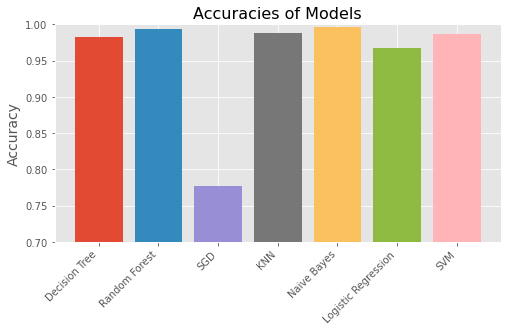

In [301]:
fig, ax = plt.subplots(figsize=(8, 4))
for name, accuracy in zip(models_list, accuracies):
    ax.bar(name, accuracy)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(0.7, 1)
    ax.set_title('Accuracies of Models', fontsize=16)

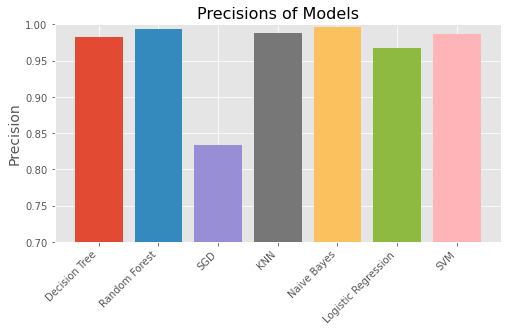

In [302]:
fig, ax = plt.subplots(figsize=(8, 4))
for name, precision in zip(models_list, precisions):
    ax.bar(name, precision)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    ax.set_ylabel('Precision', fontsize=14)
    ax.set_ylim(0.7, 1)
    ax.set_title('Precisions of Models', fontsize=16)

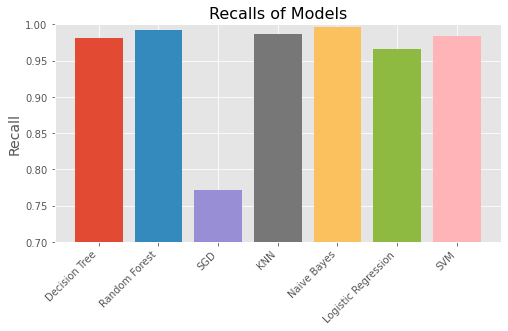

In [303]:
fig, ax = plt.subplots(figsize=(8, 4))
for name, recall in zip(models_list, recalls):
    ax.bar(name, recall)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    ax.set_ylabel('Recall', fontsize=14)
    ax.set_ylim(0.7, 1)
    ax.set_title('Recalls of Models', fontsize=16)

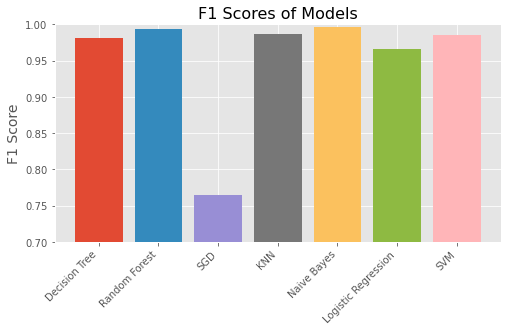

In [304]:
fig, ax = plt.subplots(figsize=(8, 4))
for name, f1 in zip(models_list, f1_scores):
    ax.bar(name, f1)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    ax.set_ylabel('F1 Score', fontsize=14)
    ax.set_ylim(0.7, 1)
    ax.set_title('F1 Scores of Models', fontsize=16)

## Recommender / Calculating Similarity Between Plants

#### Using Cosine Similarity?

In [314]:
from sklearn.metrics.pairwise import cosine_similarity

#### Using predict_proba?

In [377]:
# See which ones Naive Bayes got right
for i, j in zip(y_test, nb_pred):
    if i == j:
        print(i, j)

pigeonpeas pigeonpeas
orange orange
orange orange
apple apple
muskmelon muskmelon
coconut coconut
watermelon watermelon
cotton cotton
apple apple
blackgram blackgram
mango mango
orange orange
pomegranate pomegranate
mungbean mungbean
coconut coconut
jute jute
jute jute
coconut coconut
mungbean mungbean
papaya papaya
banana banana
muskmelon muskmelon
pomegranate pomegranate
apple apple
mothbeans mothbeans
pomegranate pomegranate
maize maize
papaya papaya
papaya papaya
cotton cotton
watermelon watermelon
jute jute
kidneybeans kidneybeans
coffee coffee
mungbean mungbean
pigeonpeas pigeonpeas
banana banana
jute jute
mothbeans mothbeans
kidneybeans kidneybeans
watermelon watermelon
cotton cotton
pigeonpeas pigeonpeas
chickpea chickpea
grapes grapes
muskmelon muskmelon
mungbean mungbean
muskmelon muskmelon
orange orange
lentil lentil
pomegranate pomegranate
pomegranate pomegranate
banana banana
apple apple
lentil lentil
kidneybeans kidneybeans
grapes grapes
watermelon watermelon
mango mango


In [385]:
crops['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [378]:
test = nb.predict_proba(X_test)
np.around(test[0], 4)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.])

In [379]:
crop_labels = crops['label'].unique()

In [380]:
np.argsort(test[0])[-3:][::-1]

array([18,  9, 13])

In [381]:
# Get top 3 recommendations for 
for i in np.argsort(test[:10]):
    i = i[-3:][::-1]
    print(f"{crop_labels[i]}\n")

['coconut' 'pomegranate' 'watermelon']

['orange' 'pigeonpeas' 'mango']

['orange' 'coconut' 'mango']

['rice' 'blackgram' 'jute']

['apple' 'papaya' 'coffee']

['pigeonpeas' 'coconut' 'lentil']

['coffee' 'papaya' 'apple']

['mungbean' 'mango' 'mothbeans']

['rice' 'blackgram' 'jute']

['chickpea' 'watermelon' 'banana']



In [389]:
# Save this as rice_df, can you just take the average of the columns?
crop_avgs = crops.groupby('label').mean()

In [465]:
similarities_d

{'apple': Index(['grapes', 'chickpea', 'mothbeans', 'lentil', 'papaya', 'banana',
        'blackgram', 'mango', 'mungbean', 'pomegranate', 'kidneybeans',
        'pigeonpeas', 'jute', 'maize', 'watermelon', 'rice', 'coconut',
        'coffee', 'orange', 'muskmelon', 'cotton'],
       dtype='object', name='label'),
 'banana': Index(['maize', 'cotton', 'blackgram', 'papaya', 'mothbeans', 'jute', 'coffee',
        'watermelon', 'lentil', 'mango', 'chickpea', 'rice', 'mungbean',
        'kidneybeans', 'pigeonpeas', 'muskmelon', 'pomegranate', 'orange',
        'coconut', 'apple', 'grapes'],
       dtype='object', name='label'),
 'blackgram': Index(['mothbeans', 'lentil', 'banana', 'mungbean', 'maize', 'papaya', 'mango',
        'jute', 'cotton', 'pigeonpeas', 'kidneybeans', 'pomegranate', 'orange',
        'rice', 'coffee', 'chickpea', 'coconut', 'watermelon', 'apple',
        'muskmelon', 'grapes'],
       dtype='object', name='label'),
 'chickpea': Index(['apple', 'grapes', 'banana', 'ki

In [472]:
crop_avgs.loc[['apple', 'grapes', 'mothbeans']]

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
mothbeans,21.44,48.01,20.23,28.194920,53.160418,6.831174,51.198487


In [473]:
np.round(crop_avgs, 2)

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.63,92.33,5.93,112.65
banana,100.23,82.01,50.05,27.38,80.36,5.98,104.63
blackgram,40.02,67.47,19.24,29.97,65.12,7.13,67.88
chickpea,40.09,67.79,79.92,18.87,16.86,7.34,80.06
coconut,21.98,16.93,30.59,27.41,94.84,5.98,175.69
coffee,101.20,28.74,29.94,25.54,58.87,6.79,158.07
cotton,117.77,46.24,19.56,23.99,79.84,6.91,80.40
grapes,23.18,132.53,200.11,23.85,81.88,6.03,69.61
jute,78.40,46.86,39.99,24.96,79.64,6.73,174.79


In [467]:
index_similarities = cosine_similarity(crop_avgs).argsort(axis=1)
index_similarities

array([[ 6, 15, 16,  5,  4, 20, 21, 11,  8, 18,  9, 19, 14, 12,  2,  1,
        17, 10, 13,  3,  7,  0],
       [ 7,  0,  4, 16, 19, 15, 18,  9, 14, 20,  3, 12, 10, 21,  5,  8,
        13, 17,  2,  6, 11,  1],
       [ 7, 15,  0, 21,  4,  3,  5, 20, 16, 19,  9, 18,  6,  8, 12, 17,
        11, 14,  1, 10, 13,  2],
       [15, 16, 14, 21,  4,  6, 19, 10,  5, 20, 11, 18, 13,  2,  8, 12,
        17,  9,  1,  7,  0,  3],
       [ 7, 15,  0, 21,  3,  6, 10,  1, 14,  2, 13, 11,  9,  5, 18, 17,
         8, 20, 12, 19, 16,  4],
       [ 7,  0, 10, 15, 14,  3, 13, 21,  2,  9, 19, 16, 18,  4,  6,  1,
        12, 17, 11, 20,  8,  5],
       [ 7,  0,  3,  9,  4, 18, 19, 16, 10, 12, 14, 20, 13, 17,  8,  2,
        15,  5, 21,  1, 11,  6],
       [16,  5,  4, 20,  6,  8, 18, 15, 11, 21,  9, 19, 12, 14, 17,  2,
         1, 13, 10,  3,  0,  7],
       [ 7, 15,  0, 10, 21, 14,  3, 13,  6,  2,  9, 16,  1, 19, 18, 11,
         4, 12, 17,  5, 20,  8],
       [15, 21,  7,  6,  0, 14, 16, 19, 10, 11,  1,  4,

In [463]:
crop_avgs.index

Index(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango',
       'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas',
       'pomegranate', 'rice', 'watermelon'],
      dtype='object', name='label')

In [464]:
similarities_d

{'apple': Index(['grapes', 'chickpea', 'mothbeans', 'lentil', 'papaya', 'banana',
        'blackgram', 'mango', 'mungbean', 'pomegranate', 'kidneybeans',
        'pigeonpeas', 'jute', 'maize', 'watermelon', 'rice', 'coconut',
        'coffee', 'orange', 'muskmelon', 'cotton'],
       dtype='object', name='label'),
 'banana': Index(['maize', 'cotton', 'blackgram', 'papaya', 'mothbeans', 'jute', 'coffee',
        'watermelon', 'lentil', 'mango', 'chickpea', 'rice', 'mungbean',
        'kidneybeans', 'pigeonpeas', 'muskmelon', 'pomegranate', 'orange',
        'coconut', 'apple', 'grapes'],
       dtype='object', name='label'),
 'blackgram': Index(['mothbeans', 'lentil', 'banana', 'mungbean', 'maize', 'papaya', 'mango',
        'jute', 'cotton', 'pigeonpeas', 'kidneybeans', 'pomegranate', 'orange',
        'rice', 'coffee', 'chickpea', 'coconut', 'watermelon', 'apple',
        'muskmelon', 'grapes'],
       dtype='object', name='label'),
 'chickpea': Index(['apple', 'grapes', 'banana', 'ki

In [439]:
similarities_d = {crop_avgs.index[row[-1]]: crop_avgs.index[row[-2::-1]] for row in index_similarities.tolist()}

pkl_filename = 'models/similarities_d.pkl'

with open(pkl_filename, 'wb') as file:
    pickle.dump(similarities_d, file)

In [462]:
for key, values in similarities_d.items():
    if key == 'watermelon':
        print(f"1st Rec: {values[0]}")
        print(f"2nd Rec: {values[1]}")
        print(f"3rd Rec: {values[2]}")
    #else:
        #print("Error - that crop is not currently in the our recommender")

1st Rec: muskmelon
2nd Rec: cotton
3rd Rec: maize


In [426]:
crop_similarities = cosine_similarity(crop_avgs).argsort(axis=1)[:,-2]

In [427]:
crop_similarities

array([ 7, 11, 13,  0, 16,  8, 11,  0, 20, 18, 13,  1, 17,  2, 13, 21, 19,
       12,  9, 16,  8, 15])

In [420]:
crop_avgs.iloc[crop_similarities]

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
mothbeans,21.44,48.01,20.23,28.194920,53.160418,6.831174,51.198487
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
orange,19.58,16.55,10.01,22.765725,92.170209,7.016957,110.474969
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
rice,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114


In [417]:
crop_avgs_copy = crop_avgs.copy()

In [422]:
crop_avgs_copy['most_similar'] = ['grapes', 'maize', 'mothbeans', 'apple', 'orange', 'jute', 'maize', 'apple', 'rice', 'pigeonpeas', 'mothbeans', 'banana', 'papaya', 'blackgram', 'mothbeans', 'watermelon', 'pomegranate', 'mango', 'kidneybeans', 'orange', 'jute', 'muskmelon']

In [423]:
crop_avgs_copy

,N,P,K,temperature,humidity,ph,rainfall,most_similar
label,,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779,grapes
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980,maize
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151,mothbeans
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977,apple
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646,orange
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295,jute
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043,maize
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829,apple
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798,rice


## Testing for Flask App

In [313]:
crops[754:755] # for testing user submission

,N,P,K,temperature,humidity,ph,rainfall,label
754,22,55,20,33.953091,69.961,7.42353,61.163505,blackgram


In [477]:
test = tf.keras.models.load_model("flask/saved_models")

In [ ]:
test.predict()